In [1]:
%cd ../

/home/starminalush/study/mfdp-2023


In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

1. Вывод всех классов в датасете

In [11]:
dataset_path=Path('data/external/affectnet')

In [14]:
print(f"Классы подвыборки: {[f.name for f in (dataset_path).iterdir() if f.is_dir()]}")

Классы подвыборки: ['disgust', 'surprise', 'anger', 'neutral', 'contempt', 'sad', 'happy', 'fear']


Вывод: в каждой подвыборке 8 классов

2. Проверка баланса классов. При этом объединим все классы с негативными эмоциями в один класс - badmood

Text(0.5, 1.0, '47914')

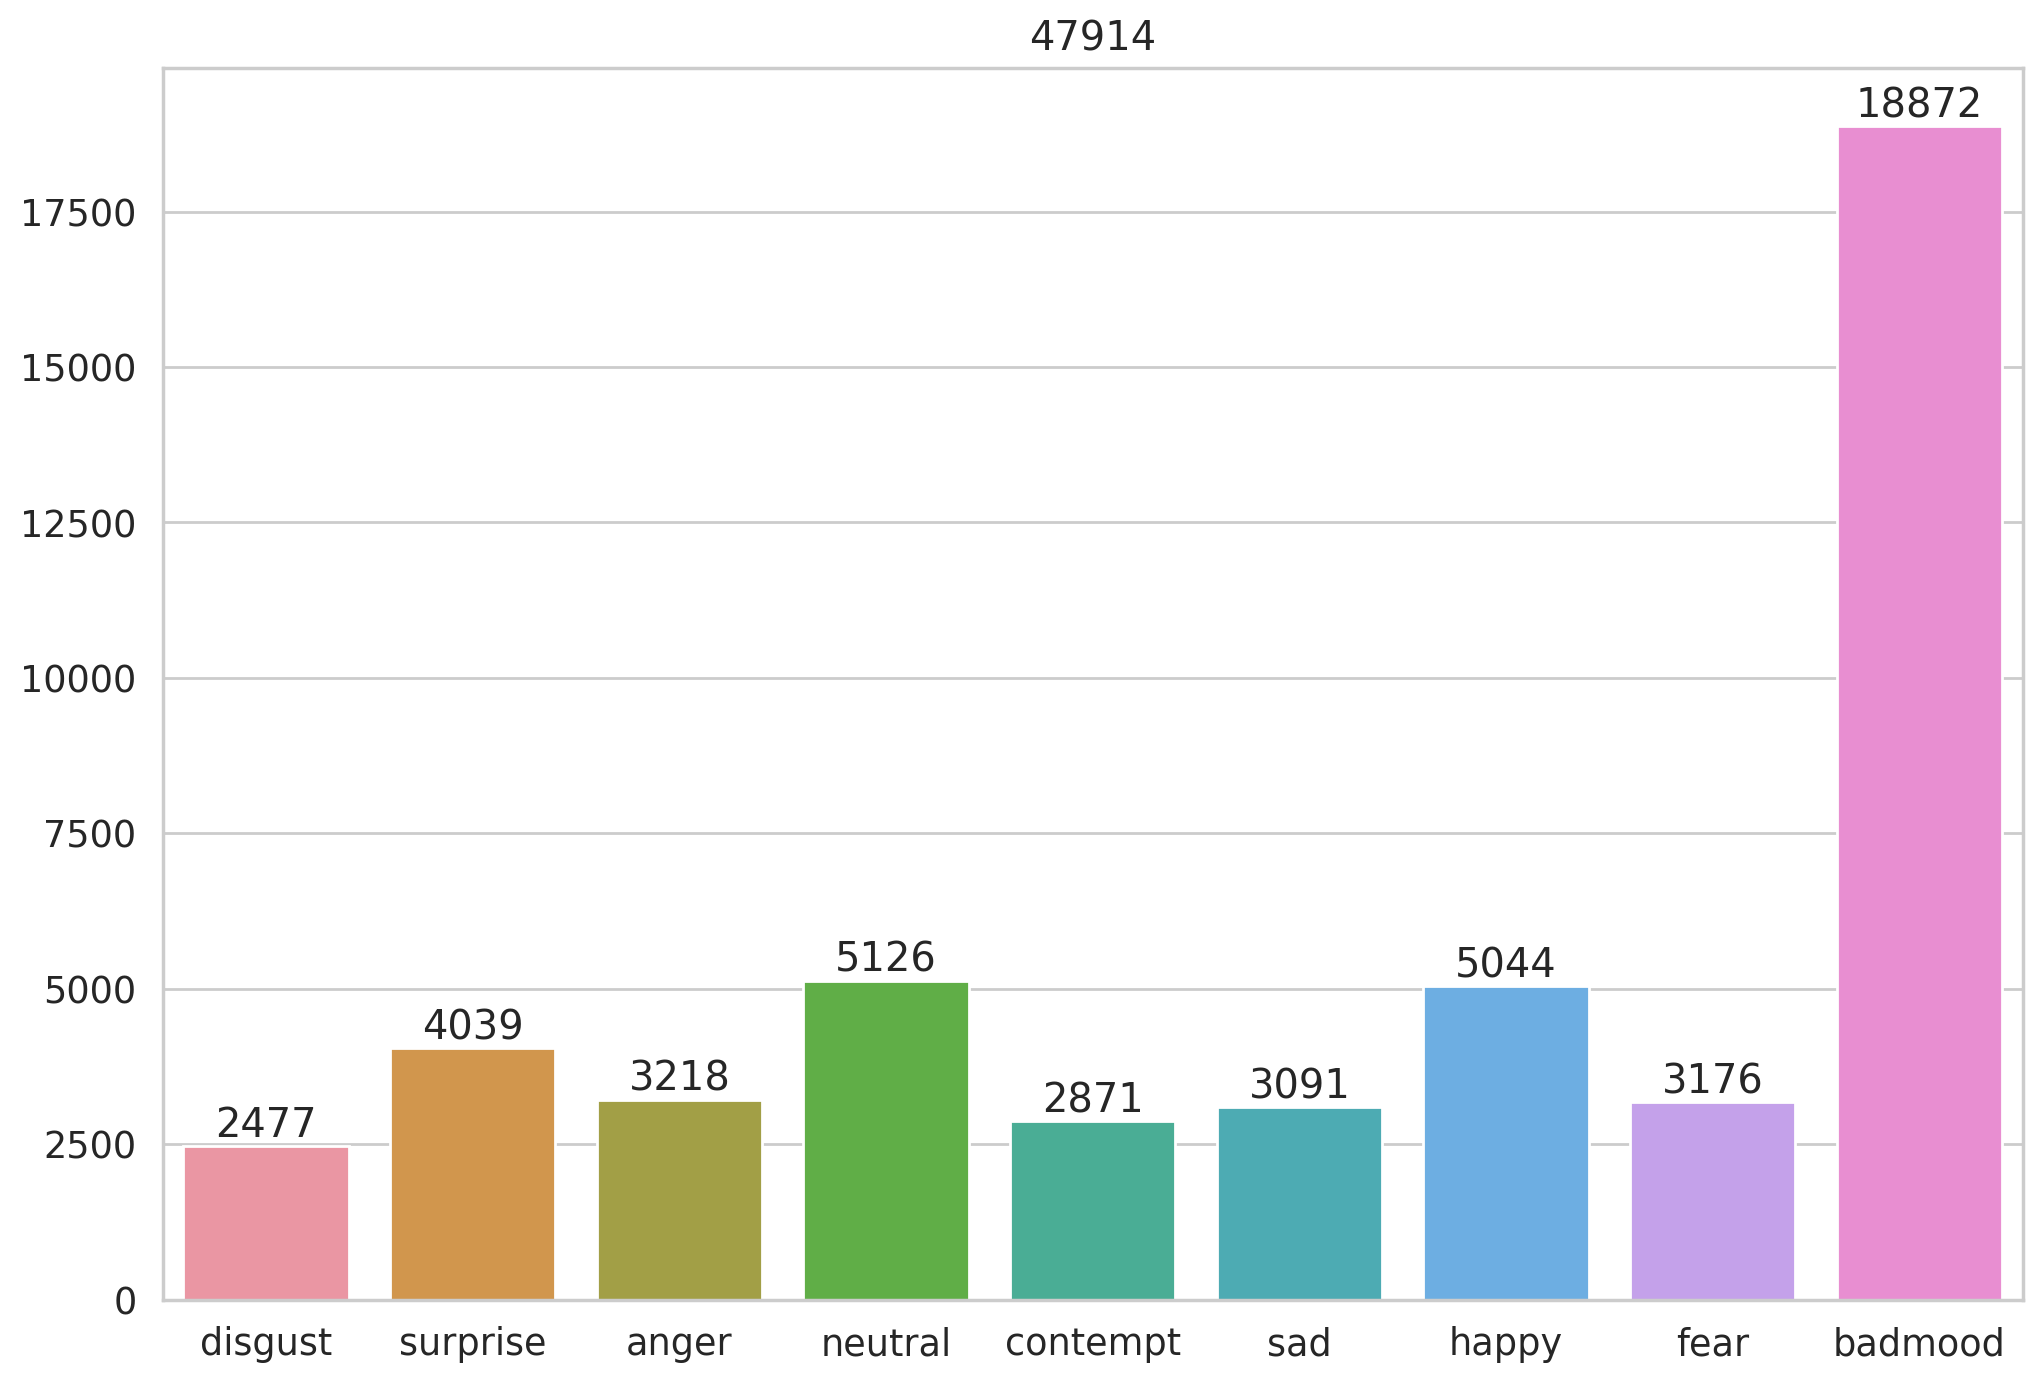

In [22]:
fig,ax = plt.subplots(1,1, figsize=(12,8), sharex=True)
sample_data  = {f.name: len([*f.iterdir()]) for f in (dataset_path).rglob("*") if f.is_dir()}
sample_data['badmood'] = sample_data['anger'] + sample_data['disgust'] + sample_data['fear']  + sample_data['sad'] + sample_data['surprise'] + sample_data['contempt']
sns_ax = sns.barplot(x=list(sample_data.keys()), y=list(sample_data.values()))
sns_ax.bar_label(sns_ax.containers[0], fmt='%i')
ax.set_title(f"{sum(sample_data.values())}")

Из данного графика можно сделать следующие выводы:
 - выборки несбалансированы по классам
 - меньше всего изображений для класса disgust, больше всего  - для класса neutral(из исходной выборки)

3. Визуализируем изображения

In [23]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 



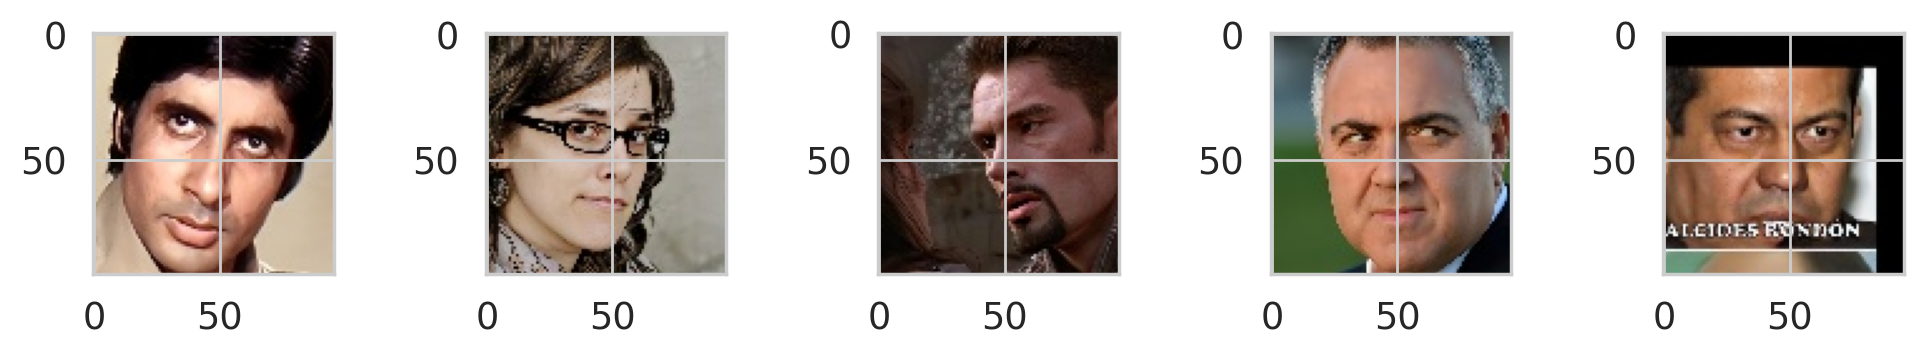

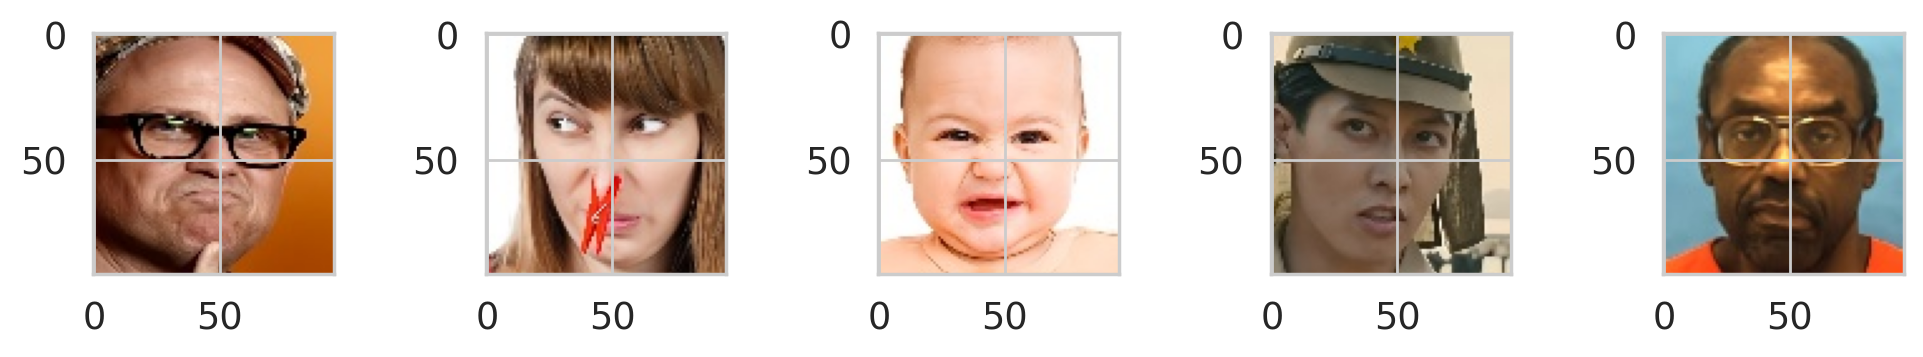

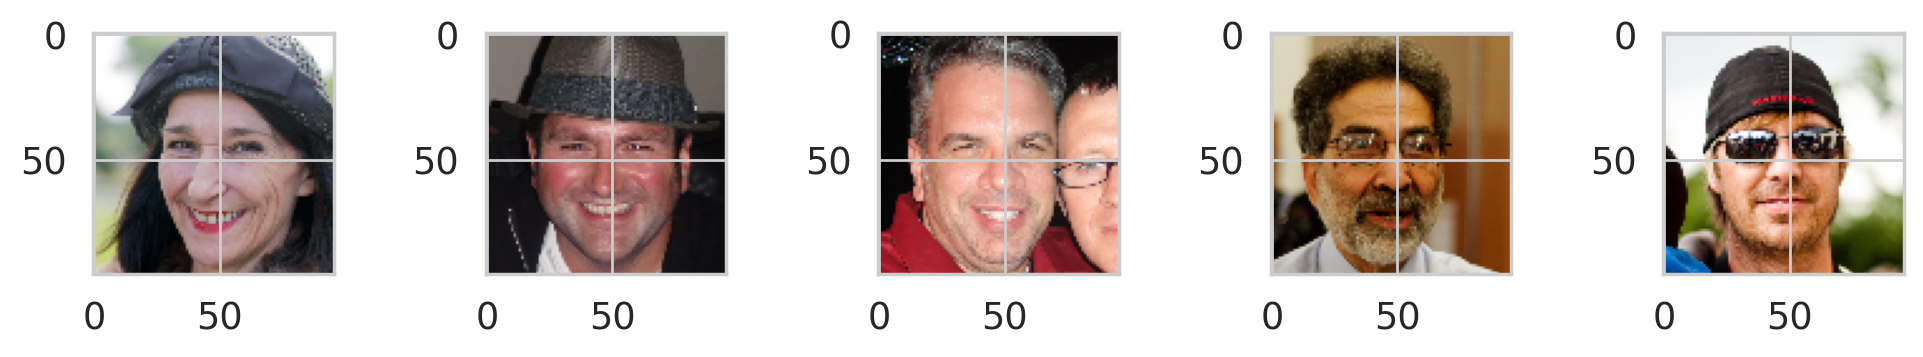

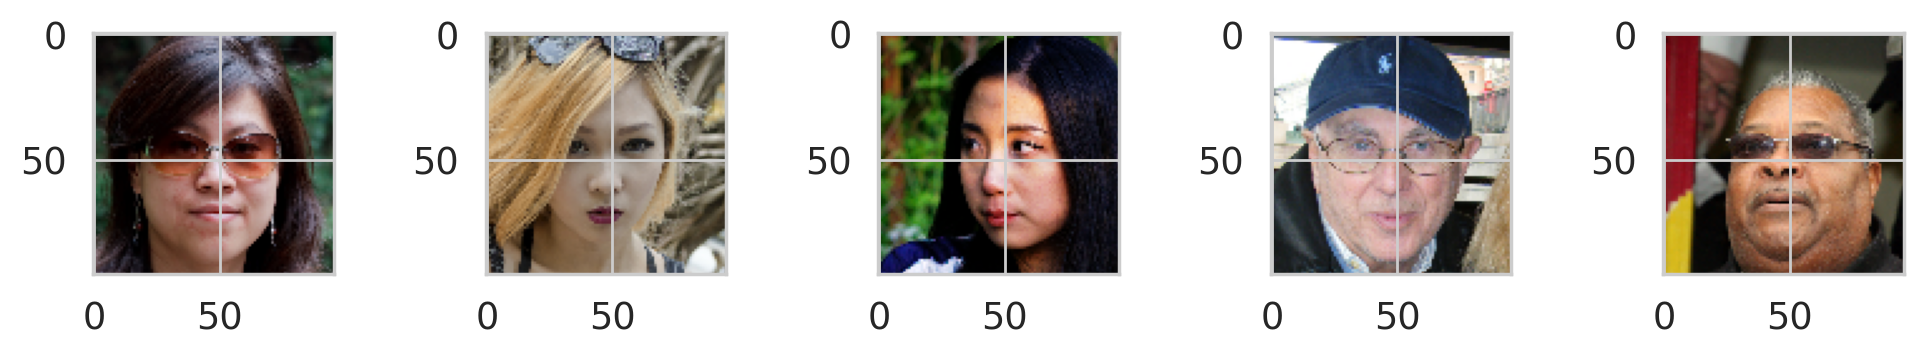

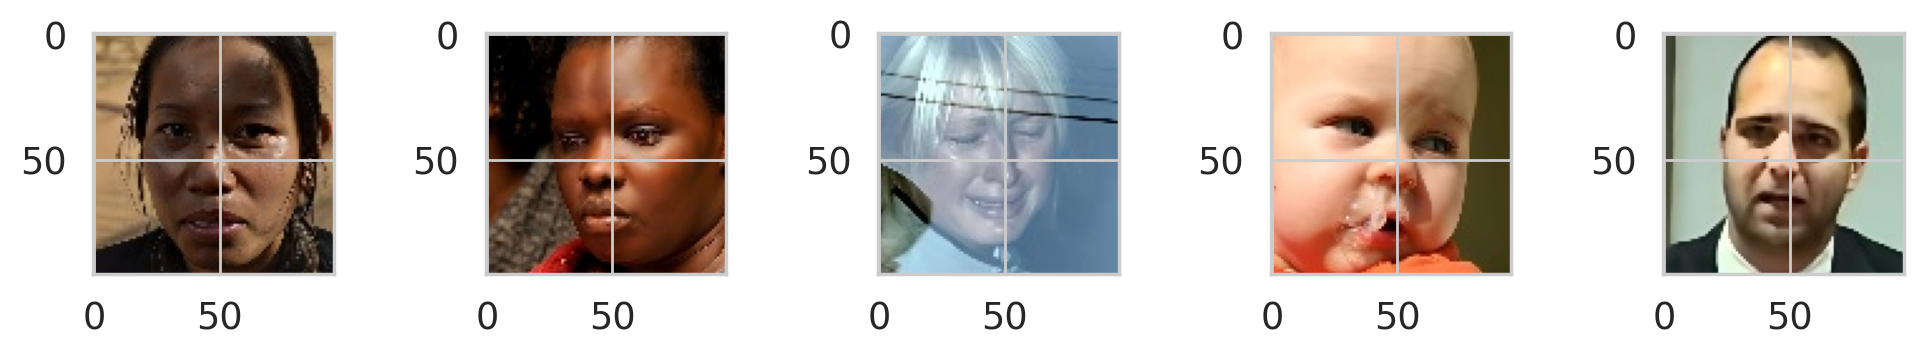

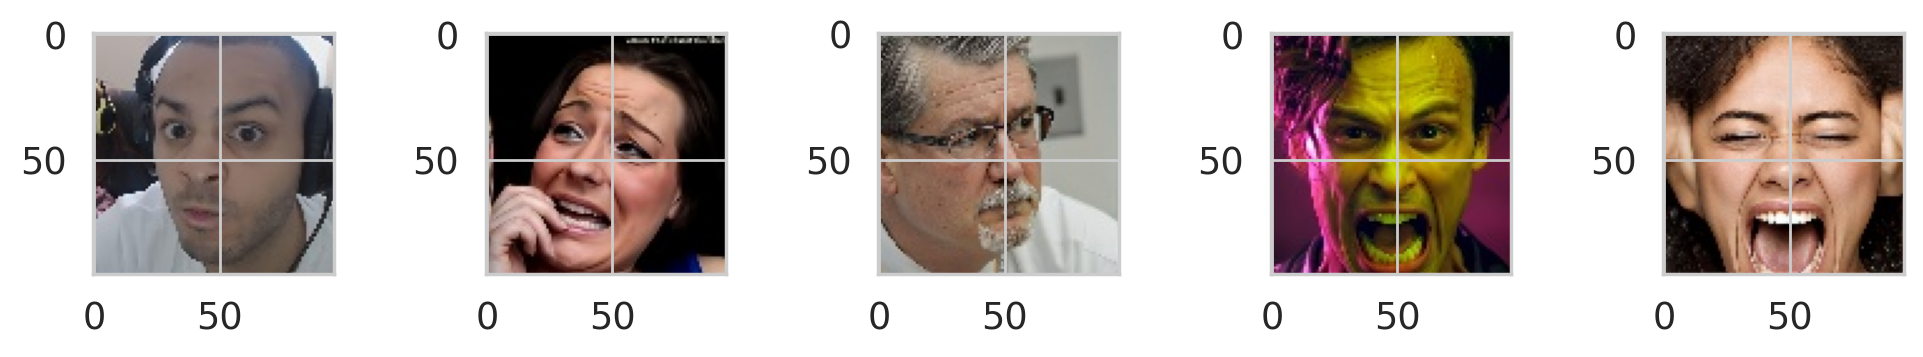

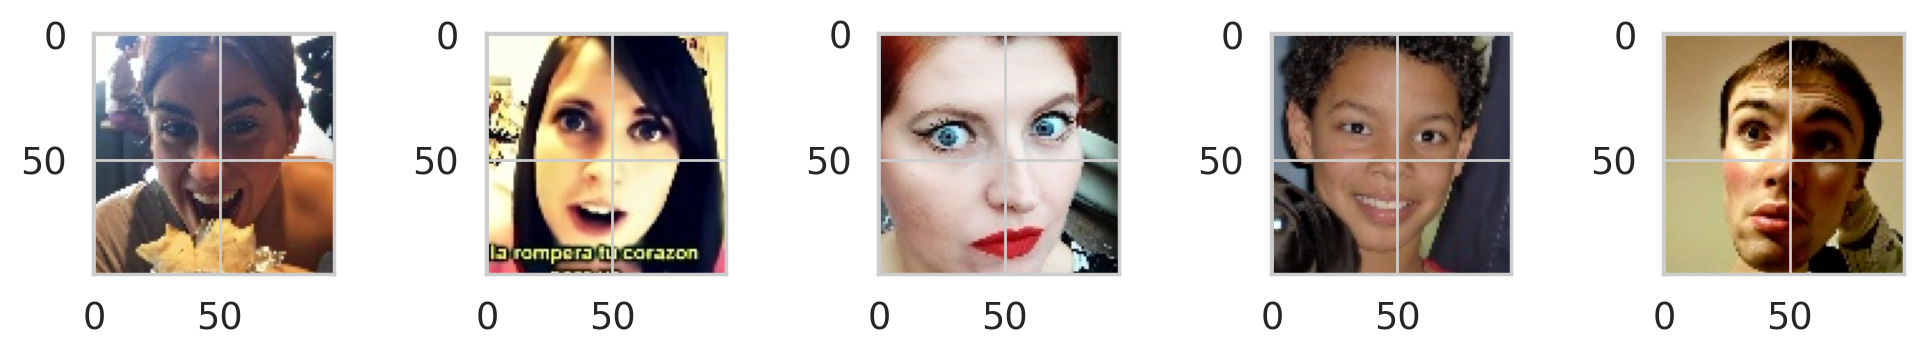

In [26]:
for cls in ['anger', 'disgust', 'happy', 'neutral', 'sad', 'fear', 'surprise']:
    plot_images(f'data/external/affectnet/{cls}')